# Deep Learning: Ex.3 - Tensorflow

Submitted by: [Maxim Gromov ID: 317225332]


In [ ]:
# TensorFlow 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


---
In this exercise we will work with two datasets (see `class3.ipynb` for details): 
- **MNIST**: handwritten digits (0-9), each sample is an image of size 28x28 (without colors)
- **CIFAR-10**: color images of 10 classes (airplanes, birds, etc..), each sample is of size 32x32x**3**

We will try to fit different models for each of these datasets:
1. **0-hidden:** simplest model, without any hidden layers
2. **1-hidden:** a model with one hidden layer (with 32 neurons in that layer)
3. **2-hidden:** a model with two hidden layer (with 32 neurons in each of these hidden layers)


General instructions:

- For each model, the input layer is the images (after flatten it to long vector), and the output layer is a `softmax` of 10 units (one unit for each class).

- Display the `model.summary()` for each model.

- Train each model for **50 epochs** (use: `batch_size=64` and `verbose=0`).

- For each model, **plot the training loss & accuracy plots**.

- Summarize the results of all models (for both datasets) in the table below (by editing this markup cell):


<table>
  <tr>
    <th>Dataset</th>
    <th>Model</th>
    <th>#parameters</th>
    <th>train accuracy</th>
    <th>test accuracy</th>
  </tr>
    
  <!-- copy this block once for every model/dataset you tested -->  
  <tr> 
    <td>MNIST</td>   <!-- Dataset -->  
    <td>0-hidden</td>   <!-- Model -->
    <td>7,850</td> <!-- #parameters -->
    <td>0.92</td> <!-- train accuracy -->
    <td>0.92</td> <!-- test accuracy -->
  </tr>
  <tr> 
    <td>MNIST</td>   <!-- Dataset -->  
    <td>1-hidden</td>   <!-- Model -->
    <td>25,450</td> <!-- #parameters -->
    <td>0.96</td> <!-- train accuracy -->
    <td>0.95</td> <!-- test accuracy -->
  </tr>
  <tr> 
    <td>MNIST</td>   <!-- Dataset -->  
    <td>2-hidden</td>   <!-- Model -->
    <td>26,506</td> <!-- #parameters -->
    <td>0.97</td> <!-- train accuracy -->
    <td>0.96</td> <!-- test accuracy -->
  </tr>
  <tr> 
    <td>CIFAR</td>   <!-- Dataset -->  
    <td>0-hidden</td>   <!-- Model -->
    <td>30,730</td> <!-- #parameters -->
    <td>0.42</td> <!-- train accuracy -->
    <td>0.38</td> <!-- test accuracy -->
  </tr>  
  <tr> 
    <td>CIFAR</td>   <!-- Dataset -->  
    <td>1-hidden</td>   <!-- Model -->
    <td>98,666</td> <!-- #parameters -->
    <td>0.51</td> <!-- train accuracy -->
    <td>0.45</td> <!-- test accuracy -->
  </tr> 
  <tr> 
    <td>CIFAR</td>   <!-- Dataset -->  
    <td>2-hidden</td>   <!-- Model -->
    <td>99,722</td> <!-- #parameters -->
    <td>0.51</td> <!-- train accuracy -->
    <td>0.39</td> <!-- test accuracy -->
  </tr> 
</table>

---



#### Loading the MNIST Dataset

MNIST_train_images.shape = (60000, 28, 28, 1)
MNIST_train_labels.shape = (60000,)
MNIST_test_images.shape = (10000, 28, 28, 1)
MNIST_test_labels.shape = (10000,)


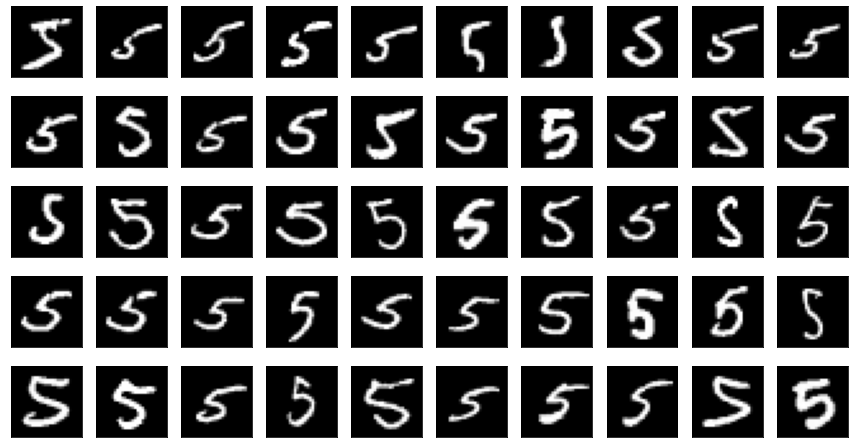

In [ ]:
# 1. load/download the data
(MNIST_train_images, MNIST_train_labels), (MNIST_test_images, MNIST_test_labels) = tf.keras.datasets.mnist.load_data()

# 2. flatten the labels (easier to deal with)
MNIST_train_labels = MNIST_train_labels.flatten()  # (50000, 1) -> (50000,)
MNIST_test_labels = MNIST_test_labels.flatten()    # (10000, 1) -> (10000,)

# 3. convert uint8->float32 and normalize range to 0.0-1.0 
MNIST_train_images = MNIST_train_images.astype('float32') / 255.0
MNIST_test_images = MNIST_test_images.astype('float32') / 255.0

# 4. expand the dimensions (tensorflow expects images in a (H,W,C) format):
MNIST_train_images = MNIST_train_images[...,None]
MNIST_test_images = MNIST_test_images[..., None]

# 5. print the shapes
print('MNIST_train_images.shape =',MNIST_train_images.shape)
print('MNIST_train_labels.shape =',MNIST_train_labels.shape)
print('MNIST_test_images.shape =',MNIST_test_images.shape)
print('MNIST_test_labels.shape =',MNIST_test_labels.shape)

# 6. lets plot some "5"s (just for fun)
[idx] = np.where(MNIST_train_labels==5) # find all the "5"s
plt.figure(figsize=(15,8))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(MNIST_train_images[idx[i],:,:,0], cmap='gray')
    plt.xticks([]), plt.yticks([])

---
#### Loading the CIFAR-10 Dataset

When running this command for the first time, it will download dataset from a remote server, which might take some time..

CIFAR_train_images.shape = (50000, 32, 32, 3)
CIFAR_train_labels.shape = (50000,)
CIFAR_test_images.shape = (10000, 32, 32, 3)
CIFAR_test_labels.shape = (10000,)


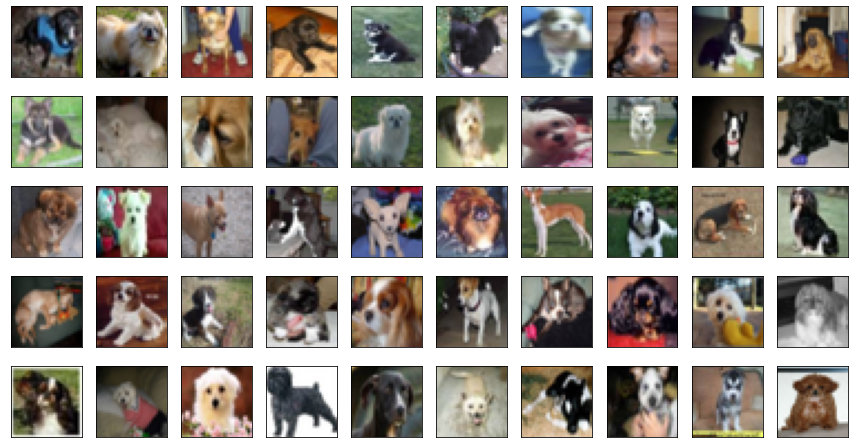

In [ ]:
# 1. load/download the data
(CIFAR_train_images, CIFAR_train_labels), (CIFAR_test_images, CIFAR_test_labels) = tf.keras.datasets.cifar10.load_data()

# 2. flatten the labels (easier to deal with)
CIFAR_train_labels = CIFAR_train_labels.flatten()  # (50000, 1) -> (50000,)
CIFAR_test_labels = CIFAR_test_labels.flatten()    # (10000, 1) -> (10000,)

# 3. convert uint8->float32 and normalize range to 0.0-1.0 
CIFAR_train_images = CIFAR_train_images.astype('float32') / 255.0
CIFAR_test_images = CIFAR_test_images.astype('float32') / 255.0

# 4. define the 10 classes names
CIFAR_class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

# 5. print the shapes
print('CIFAR_train_images.shape =',CIFAR_train_images.shape)
print('CIFAR_train_labels.shape =',CIFAR_train_labels.shape)
print('CIFAR_test_images.shape =',CIFAR_test_images.shape)
print('CIFAR_test_labels.shape =',CIFAR_test_labels.shape)

# 6. lets plot some 'dogs' (just for fun)
[idx] = np.where(CIFAR_train_labels==5) # find all the dogs
plt.figure(figsize=(15,8))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(CIFAR_train_images[idx[i]])
    plt.xticks([]), plt.yticks([])

***
#### 1. MNIST with 0-hidden


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28,1)))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(MNIST_train_images, MNIST_train_labels, epochs=50, batch_size=64, verbose=0, 
                    validation_data=(MNIST_test_images, MNIST_test_labels))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


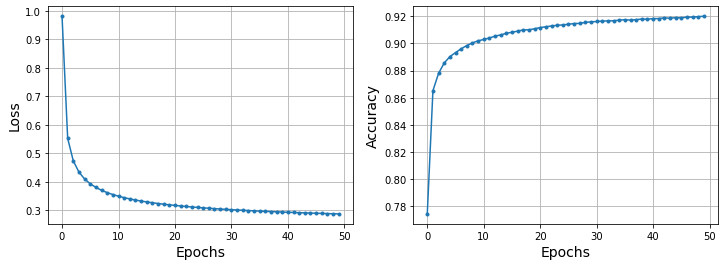

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'.-')
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'.-')
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid()

***
#### 2. MNIST with 1-hidden

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28,1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(MNIST_train_images, MNIST_train_labels, epochs=50, batch_size=64, verbose=0, 
                    validation_data=(MNIST_test_images, MNIST_test_labels))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


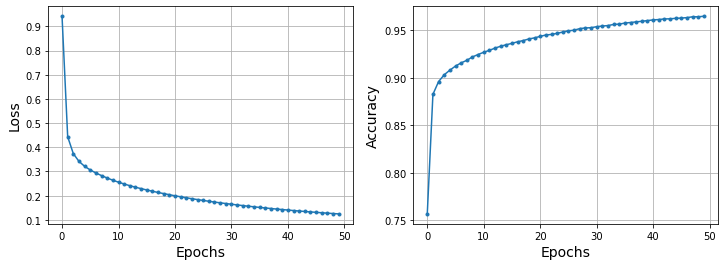

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'.-')
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'.-')
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid()

***
#### 3. MNIST with 2-hidden


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28,1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(MNIST_train_images, MNIST_train_labels, epochs=50, batch_size=64, verbose=0, 
                    validation_data=(MNIST_test_images, MNIST_test_labels))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


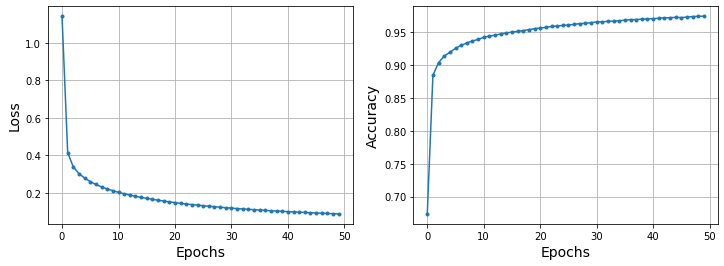

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'.-')
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'.-')
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid()

***
#### 4. CIFAR with 0-hidden


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32,3)))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(CIFAR_train_images, CIFAR_train_labels, epochs=50, batch_size=64, verbose=0, 
                    validation_data=(CIFAR_test_images, CIFAR_test_labels))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


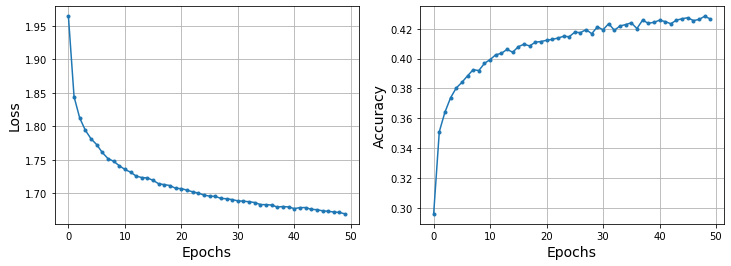

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'.-')
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'.-')
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid()

***
#### 5. CIFAR with 1-hidden



In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32,3)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(CIFAR_train_images, CIFAR_train_labels, epochs=50, batch_size=64, verbose=0, 
                    validation_data=(CIFAR_test_images, CIFAR_test_labels))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                98336     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 98,666
Trainable params: 98,666
Non-trainable params: 0
_________________________________________________________________


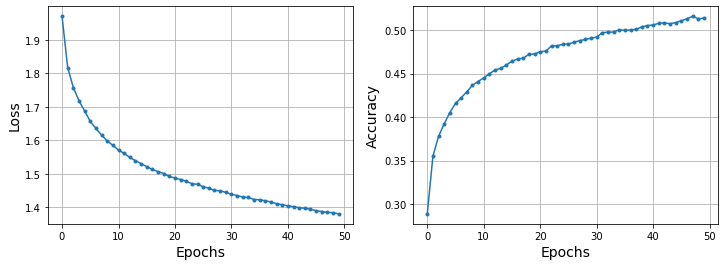

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'.-')
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'.-')
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid()

***
#### 6. CIFAR with 2-hidden


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32,3)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(CIFAR_train_images, CIFAR_train_labels, epochs=50, batch_size=64, verbose=0, 
                    validation_data=(CIFAR_test_images, CIFAR_test_labels))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                98336     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 99,722
Trainable params: 99,722
Non-trainable params: 0
_________________________________________________________________


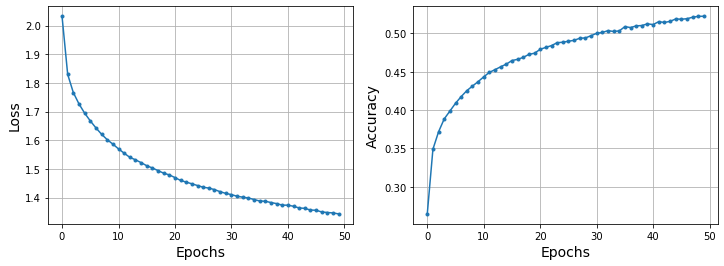

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'.-')
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'.-')
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid()